<a href="https://colab.research.google.com/github/karaogluhh/Computer-Vision-Notes/blob/main/OpenCV_Tutorials_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

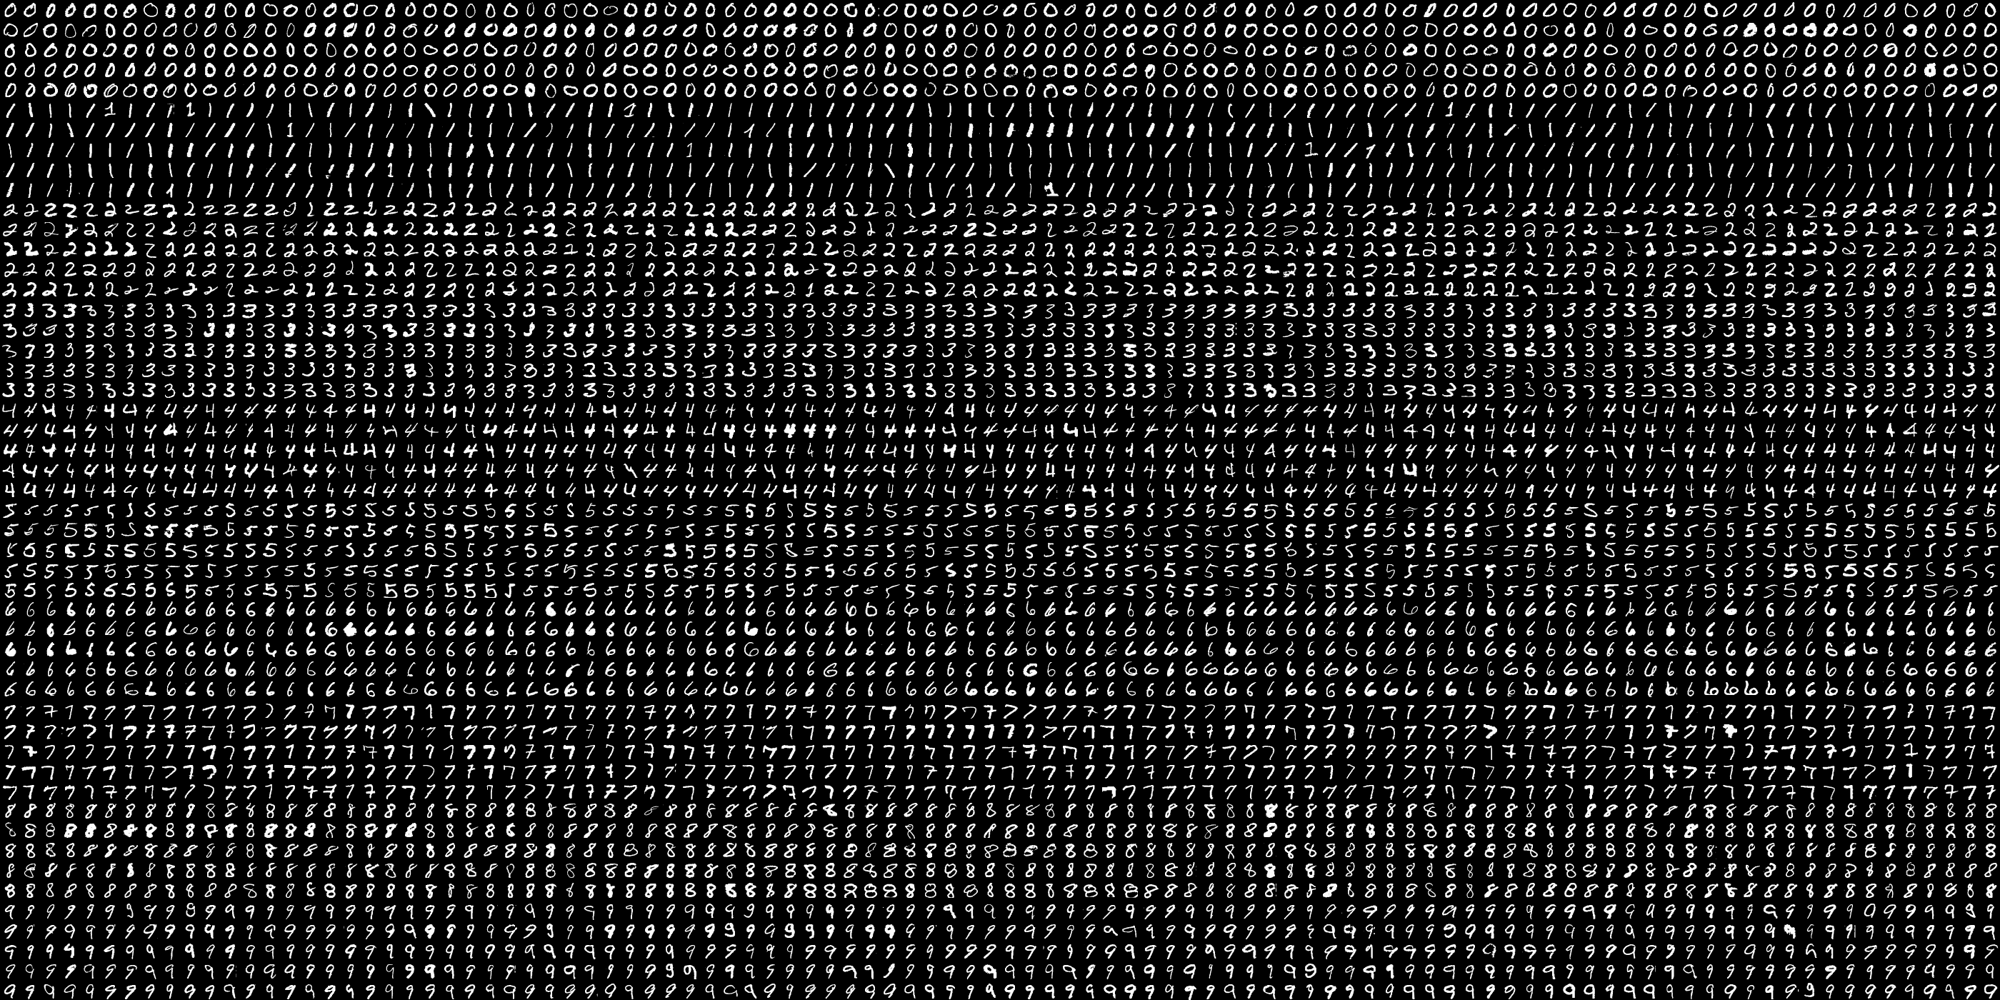

In [2]:
im = cv2.imread('digits.png')
cv2_imshow(im)

In [4]:
im.shape

(1000, 2000, 3)

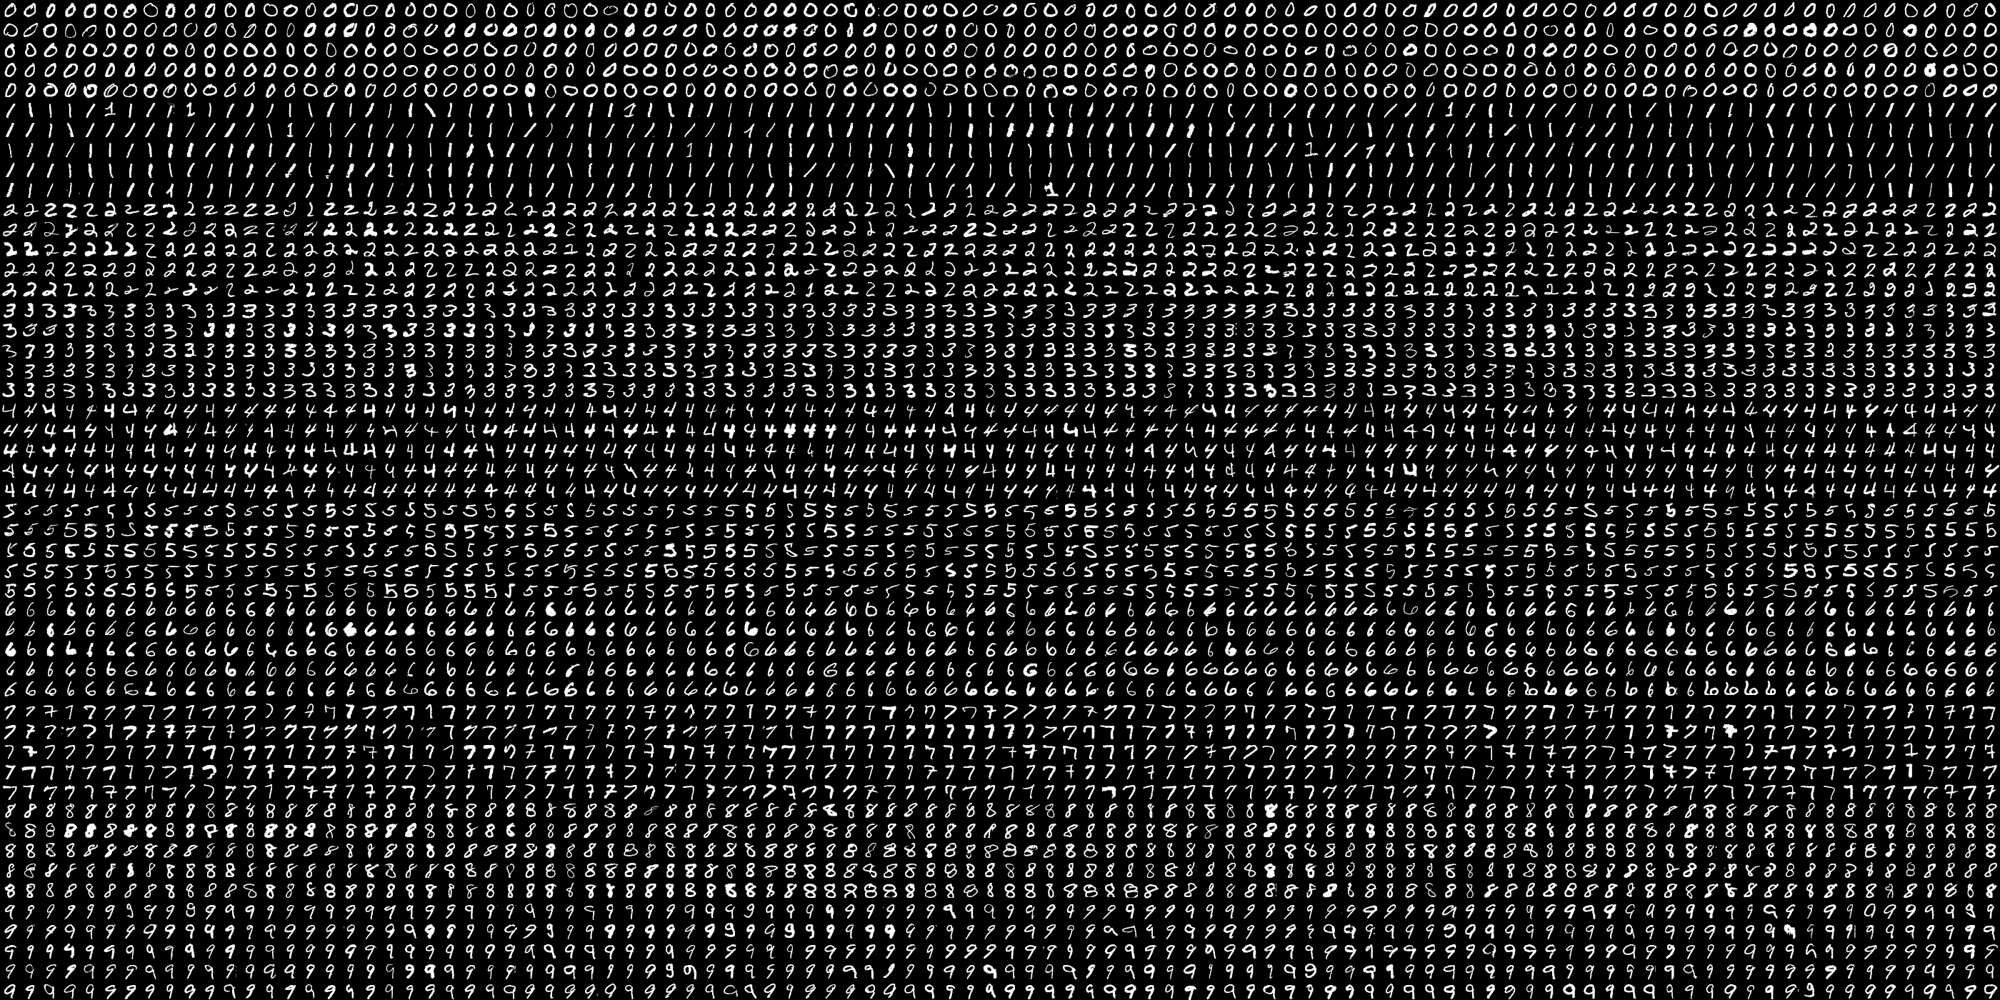

In [5]:
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
cv2_imshow(im_gray)

In [8]:
cells = [np.hsplit(row, 100) for row in np.vsplit(im_gray, 50)]
x = np.array(cells)
x.shape

(50, 100, 20, 20)

In [13]:
train = x[:, :50].reshape(-1, 400).astype(np.float32)
test = x[:, 50:100].reshape(-1, 400).astype(np.float32)

k = np.arange(10)
train_labels = np.repeat(k, 250)[:, np.newaxis]
test_labels = train_labels.copy()

train_labels.shape

(2500, 1)

In [14]:
knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)
ret, result, neighbours, dist = knn.findNearest(test, k=5)

In [15]:
matches = (result == test_labels)
correct = np.count_nonzero(matches)
accuracy = correct * 100.0 / result.size
print(accuracy)

91.76


## OCR of the English Alphabet

In [17]:
data = np.loadtxt("letter-recognition.data", dtype='float32', delimiter=',',
                  converters={0: lambda ch: ord(ch) - ord('A')})
data.shape

(20000, 17)

In [19]:
train, test = np.vsplit(data, 2)

responses, TrainData = np.hsplit(train, [1])
labels, TestData = np.hsplit(test, [1])

responses.shape, TrainData.shape

((10000, 1), (10000, 16))

In [20]:
knn = cv2.ml.KNearest_create()
knn.train(TrainData, cv2.ml.ROW_SAMPLE, responses)
ret, result, neighbours, dist = knn.findNearest(TestData, k=5)

In [21]:
correct = np.count_nonzero(result == labels)
accuracy = correct * 100.0 / 10000
print(accuracy)

93.06
